In [189]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pylab as plt
from dmba import classificationSummary
from sklearn.model_selection import train_test_split

import matplotlib.pylab as plt
from dmba import liftChart, gainsChart

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

## 12.1

In [144]:
bank_df = pd.read_csv('D:/숙탯 2기/dmba-datasets/UniversalBank.csv')
bank_df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [145]:
bank_df = pd.get_dummies(bank_df.iloc[:, 1:], columns = ['Family', 'Education'])
bank_df = bank_df.drop(columns=['ZIP Code'])
bank_df

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,1,49,1.6,0,0,1,0,0,0,0,0,0,1,1,0,0
1,45,19,34,1.5,0,0,1,0,0,0,0,0,1,0,1,0,0
2,39,15,11,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,9,100,2.7,0,0,0,0,0,0,1,0,0,0,0,1,0
4,35,8,45,1.0,0,0,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1.9,0,0,0,0,1,0,1,0,0,0,0,0,1
4996,30,4,15,0.4,85,0,0,0,1,0,0,0,0,1,1,0,0
4997,63,39,24,0.3,0,0,0,0,0,0,0,1,0,0,0,0,1
4998,65,40,49,0.5,0,0,0,0,1,0,0,0,1,0,0,1,0


In [147]:
X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

### a.

In [148]:
bank_df.groupby('Personal Loan').describe()

Age                                                      \
                count       mean        std   min   25%   50%   75%   max   
Personal Loan                                                               
0              4520.0  45.367257  11.450427  23.0  35.0  45.0  55.0  67.0   
1               480.0  45.066667  11.590964  26.0  35.0  45.0  55.0  65.0   

              Experience             ... Education_2      Education_3  \
                   count       mean  ...         75%  max       count   
Personal Loan                        ...                                
0                 4520.0  20.132301  ...         1.0  1.0      4520.0   
1                  480.0  19.843750  ...         1.0  1.0       480.0   

                                                            
                   mean       std  min  25%  50%  75%  max  
Personal Loan                                               
0              0.286726  0.452282  0.0  0.0  0.0  1.0  1.0  
1              0.427083  0.495171  0.0  0.0  0.0  1.0  1.0  

[2 rows x 128 columns]

In [149]:
bank_df.columns

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Family_1',
       'Family_2', 'Family_3', 'Family_4', 'Education_1', 'Education_2',
       'Education_3'],
      dtype='object')

In [266]:
bank_df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan']].groupby('Personal Loan').mean().transpose()

Personal Loan,0,1
Age,45.367257,45.066667
Experience,20.132301,19.843750
Income,66.237389,144.745833
CCAvg,1.729009,3.905354
Mortgage,51.789381,100.845833


Income과 Mortage에서 평균 차이가 크게 남.

In [267]:
bank_df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan']].groupby('Personal Loan').std().transpose()

Personal Loan,0,1
Age,11.450427,11.590964
Experience,11.456672,11.582443
Income,40.578534,31.584429
CCAvg,1.567647,2.097681
Mortgage,92.038931,160.847862


Income과 Mortgage의 표준편차 차이가 크게 나타남

In [270]:
cols = ['Securities Account', 'CD Account', 'Online', 'CreditCard', 'Family_1',
       'Family_2', 'Family_3', 'Family_4', 'Education_1', 'Education_2',
       'Education_3']

for c in cols:
    print(bank_df[c].value_counts()/bank_df[c].size, '\n')

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64 

0    0.9396
1    0.0604
Name: CD Account, dtype: float64 

1    0.5968
0    0.4032
Name: Online, dtype: float64 

0    0.706
1    0.294
Name: CreditCard, dtype: float64 

0    0.7056
1    0.2944
Name: Family_1, dtype: float64 

0    0.7408
1    0.2592
Name: Family_2, dtype: float64 

0    0.798
1    0.202
Name: Family_3, dtype: float64 

0    0.7556
1    0.2444
Name: Family_4, dtype: float64 

0    0.5808
1    0.4192
Name: Education_1, dtype: float64 

0    0.7194
1    0.2806
Name: Education_2, dtype: float64 

0    0.6998
1    0.3002
Name: Education_3, dtype: float64 



### b. (i)

In [155]:
da_reg = LinearDiscriminantAnalysis()
da_reg.fit(train_X, train_y)

classificationSummary(valid_y, 
                      da_reg.predict(valid_X),
                      class_names=da_reg.classes_)

Confusion Matrix (Accuracy 0.9430)

       Prediction
Actual    0    1
     0 1776   31
     1   83  110


### b. (ii)

In [156]:
31/(1776+31)

0.01715550636413946

In [157]:
83/(83+110)

0.43005181347150256

클래스 1에 대한 오분류율이 더 크다.

### b. (iii)

In [196]:
result_df = pd.concat([valid_X, valid_y], axis=1).copy()
result_df.index = result_df.index + 1
result_df['Dec. Function'] = da_reg.decision_function(valid_X)
result_df['Prediction'] = da_reg.predict(valid_X)
result_df['p(Owner)'] = da_reg.predict_proba(valid_X)[:, 1]

condition = (result_df['Personal Loan'] == 0) & (result_df['Prediction'] ==1)
result_df[condition].head(3)['p(Owner)']

933     0.942790
3348    0.925045
1574    0.554285
Name: p(Owner), dtype: float64

0.5보다 훨씬 큰 확률을 가지는 관측치들이 있음 (Income과 Mortgage 때문?)

In [197]:
condition = (result_df['Personal Loan'] == 1) & (result_df['Prediction'] == 0)
result_df[condition].head(3)['p(Owner)']

4378    0.283673
3272    0.092847
350     0.000475
Name: p(Owner), dtype: float64

0.5보다 훨씬 작은 확률을 가지는 관측치들이 있음

### c.

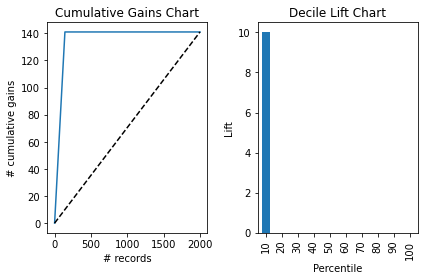

In [165]:
pred_v = pd.Series(da_reg.predict(valid_X))
pred_v = pred_v.sort_values(ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_title('Cumulative Gains Chart')

ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()

### d.

In [190]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.9620)

       Prediction
Actual    0    1
     0 1794   13
     1   63  130


In [192]:
print(f'대출 수락자에 대한 오분류율: {63/(63+130)}')

대출 수락자에 대한 오분류율: 0.32642487046632124


b. (i)의 결과와 비교했을 때 로지스틱 회귀분석이 더 좋은 성능을 보인다. (전체적인 정확도가 더 높고 대출 수락자에 대한 오분류율이 더 낮음)

### e.

In [198]:
0 + (-31*50) -83 + 110*50

3867

### f.

대출 수락자가 대출 거절자로 오분류되는 경우를 줄여야 하므로 컷오프값을 낮춰야 한다.

## 12.2

In [242]:
adm_df = pd.read_csv('D:/숙탯 2기/dmba-datasets/SystemAdministrators.csv')
adm_df.head()

,Experience,Training,Completed task
0,10.9,4,Yes
1,9.9,4,Yes
2,10.4,6,Yes
3,13.7,6,Yes
4,9.4,8,Yes


### a.

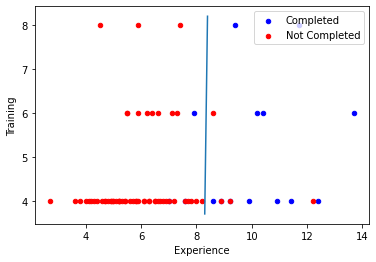

In [215]:
ax = adm_df[adm_df['Completed task']=='Yes'].plot.scatter(x='Experience', y='Training', c='blue', label='Completed')
adm_df[adm_df['Completed task']=='No'].plot.scatter(x='Experience', y='Training', c='red', label='Not Completed', ax=ax)

x_adhoc = np.array([8.3, 8.4])
y_adhoc = np.array([3.7, 8.2])
ax.plot(x_adhoc, y_adhoc, '-', color='C0', label='ad hoc line')

In [217]:
# condition = (adm_df.Experience > 8) & (adm_df.Training < 4.5)
# adm_df[condition]

,Experience,Training,Completed task
0,10.9,4,Yes
1,9.9,4,Yes
5,12.4,4,Yes
7,8.9,4,Yes
9,11.4,4,Yes
10,8.6,4,Yes
11,9.2,4,Yes
24,8.9,4,No
39,12.2,4,No
58,9.2,4,No


### b.

In [218]:
da_reg = LinearDiscriminantAnalysis()
da_reg.fit(adm_df.drop(columns=['Completed task']), adm_df['Completed task'])

LinearDiscriminantAnalysis()

In [219]:
result_df = adm_df.copy()
result_df.index = result_df.index + 1

result_df['Prediction'] = da_reg.predict(adm_df.drop(columns=['Completed task']))

In [223]:
result_df.groupby('Prediction').size()

Prediction
No     63
Yes    12
dtype: int64

In [224]:
63/(63+12)

0.84

84%가 완료하지 못한 것으로 분류되었다.

### c.

In [225]:
print('Coefficients', da_reg.coef_)
print('Intercept', da_reg.intercept_)

Coefficients [[1.44469947 0.14427824]]
Intercept [-13.60512707]


In [227]:
Experience = 4      # 4개월 오타 같음
Training = 6

-13.60512707 + 1.44469947*Experience + 0.14427824*Training

-6.96065975

In [226]:
# adm_df.Experience.unique()

array([10.9,  9.9, 10.4, 13.7,  9.4, 12.4,  7.9,  8.9, 10.2, 11.4,  8.6,
        9.2, 11.7,  7.6,  7. ,  4.9,  7.1,  5. ,  4.8,  4.4,  4.2,  6.3,
        4.7,  5.2,  5.5,  5.4,  5.7,  7.7,  2.7,  6.7,  6.2,  6.6,  3.6,
        7.3, 12.2,  5.8,  6.1,  4.1,  4.5,  7.8,  4.3,  6.9,  6.8,  4.6,
        7.2,  5.1,  5.9,  8. ,  4. ,  6.5,  7.4,  8.2,  5.6,  6.4,  3.8,
        5.3])

In [234]:
df = pd.DataFrame({'Experience':[4], 'Training':[6]})
da_reg.predict_proba(df)

array([[9.99052428e-01, 9.47571894e-04]])

0.999 > 0.000947  
완료하지 못한 것으로 분류된다.

-13.60512707 + 1.44469947*Experience + 0.14427824*Training > 0

In [357]:
(-0.14427824*4 + 13.60512707)/1.44469947

9.017802235367332

### e.

In [238]:
classificationSummary(adm_df['Completed task'],
                      da_reg.predict(adm_df.drop(columns=['Completed task'])),
                      class_names=da_reg.classes_)

Confusion Matrix (Accuracy 0.9067)

       Prediction
Actual  No Yes
    No  58   2
   Yes   5  10


In [243]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(adm_df.drop(columns=['Completed task']), adm_df['Completed task'])

classificationSummary(adm_df['Completed task'], logit_reg.predict(adm_df.drop(columns=['Completed task'])))

Confusion Matrix (Accuracy 0.9067)

       Prediction
Actual  0  1
     0 58  2
     1  5 10


## 12.3

### a.

In [353]:
spam_df = pd.read_csv('D:/숙탯 2기/dmba-datasets/spambase.csv')
spam_df.head()

,make,address,all,W_3d,our,over,remove,internet,order,mail,...,C;,C(,C[,C!,C$,C#,CAP_avg,CAP_long,CAP_tot,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [316]:
mean_df = spam_df.groupby('Spam').mean().transpose()
mean_df

Spam,0,1
make,0.073479,0.152339
address,0.244466,0.164650
all,0.200581,0.403795
W_3d,0.000886,0.164672
our,0.181040,0.513955
over,0.044544,0.174876
remove,0.009383,0.275405
internet,0.038415,0.208141
order,0.038049,0.170061
mail,0.167170,0.350507


In [339]:
def rate(df):
    ds = pd.Series(dtype='float64')
    for i in df.index:
        if (df.loc[i][0]/df.loc[i][1]) >= 1:
            ds[i] = df.loc[i][0]/df.loc[i][1]
        else:
            ds[i] = df.loc[i][1]/df.loc[i][0]
    return ds

rate(mean_df).sort_values(ascending = False).head(11)

cs         1305.841212
george      816.343848
lab         238.020754
W_3d        185.872477
W_857       149.102495
meeting      88.729672
telnet       83.219838
hp           51.230463
hpl          47.095947
W_415        43.797432
W_000        34.857704
dtype: float64

11개 예측변수 : 'cs', 'george', 'lab', 'W_3d', 'W_857', 'meeting', 'telnet', 'hp',
       'hpl', 'W_415', 'W_000'  

위 11개 단어/기호들이 스팸에서 자주 발생.

### b.

In [334]:
spam_df = spam_df.loc[:, ['cs', 'george', 'lab', 'W_3d', 'W_857', 'meeting', 'telnet', 'hp', 'hpl', 'W_415', 'W_000', 'Spam']]

X = spam_df.drop(columns=['Spam'])
y = spam_df['Spam']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [338]:
da_reg = LinearDiscriminantAnalysis()
da_reg.fit(train_X, train_y)

print('Coefficients', da_reg.coef_)
print('Intercept', da_reg.intercept_)


Coefficients [[-0.80349427 -0.13193296 -0.1628845   0.07946074 -0.7189669  -0.40774167
  -0.33026664 -0.24800257 -0.41847786  1.42942312  2.22469854]]
Intercept [-0.42043835]


### c.

In [344]:
classificationSummary(train_y, 
                      da_reg.predict(train_X),
                      class_names=da_reg.classes_)

Confusion Matrix (Accuracy 0.7250)

       Prediction
Actual    0    1
     0 1675   15
     1  744  326


In [348]:
round(326/(744+326), 3)

0.305

In [340]:
classificationSummary(valid_y, 
                      da_reg.predict(valid_X),
                      class_names=da_reg.classes_)

Confusion Matrix (Accuracy 0.7078)

       Prediction
Actual    0    1
     0 1089    9
     1  529  214


In [349]:
round(214/(529+214), 3)

0.288

스팸을 제대로 발견하는 비율이 낮으므로 유용한 모형으로 보기 어렵다.